## Referencias utiles
- Imágenes: http://dis.um.es/~ginesgm/files/doc/sib/Estudio2.rar
- [Kaggle Full Preprocessing Tutorial](https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial)
- [DICOM Processing and Segmentation in Python](https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/)

## 1. Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from scipy.ndimage import label # conected component

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

print("Numpy:\t" + np.__version__)
print("OpenCV:\t" + cv2.__version__)

Numpy:	1.15.4
OpenCV:	3.4.3


## 2. Read images

In [2]:
def imageName(number):
    return "Estudio2/i" + str(number).zfill(4) + "_0000b.ppm"

def image(number):
    return cv2.imread(imageName(number), -1)

def plot(number):
    plt.imshow(image(number));

interact(plot, number=(0,400,10));

interactive(children=(IntSlider(value=200, description='number', max=400, step=10), Output()), _dom_classes=('…

## 3. Binarize

In [3]:
def bin(number):
    fig=plt.figure(figsize=(16, 16))

    ####################### image
    img = image(number)
    fig.add_subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(img, cmap="viridis")

    ####################### Range mask
    msk = cv2.inRange(img, 19000, 21000)
    fig.add_subplot(1, 3, 2)
    plt.title("values from 19000 to 21000")
    plt.imshow(msk)

    ####################### morphologyEx
    kernel = np.ones((3,3), np.uint8)
    msk = cv2.morphologyEx(msk, cv2.MORPH_OPEN, kernel)
    msk = cv2.morphologyEx(msk, cv2.MORPH_CLOSE, kernel)
    fig.add_subplot(1, 3, 3)
    plt.title("open and close")
    plt.imshow(msk);

    plt.show()

interact(bin, number=(0,400,5));

interactive(children=(IntSlider(value=200, description='number', max=400, step=5), Output()), _dom_classes=('w…

## 4. Contours (not used)

In [4]:
_,cont,_ = cv2.findContours(msk, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

def esAorta(contorno):
    perim = len(contorno)
    
    if perim<30:    # area muy pequena
        return False
    
    else: #es redondeado?
        areaEsperada = perim*perim/(4*3.1416)
        areaReal     = cv2.contourArea(contorno)
        return areaReal/areaEsperada>0.9 #0.95

for c in cont:
    if esAorta(c):
        cv2.drawContours(img, [c], -1, 65000)
plt.imshow(img);

NameError: name 'msk' is not defined

## 5. Get 3D data

In [6]:
list_of_masks = []

kernel = np.ones((3,3), np.uint8)
for i in range(400):
    img = image(i)

    msk = cv2.inRange(img, 19000, 21000)    
    msk = cv2.morphologyEx(msk, cv2.MORPH_OPEN, kernel)
    msk = cv2.morphologyEx(msk, cv2.MORPH_CLOSE, kernel)
    
    list_of_masks.append(msk)
    
cube = np.stack(list_of_masks)
cube.shape

(400, 512, 512)

## 6. Get connected components (in 3D)

In [12]:
labelled_cube, num_labels = label(cube)

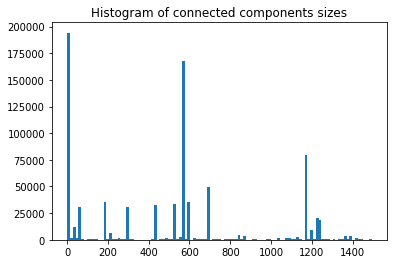

In [13]:
plt.hist(labelled_cube.flatten(), bins='auto', range=(1,1493))  # arguments are passed to np.histogram
plt.title("Histogram of connected components sizes")
plt.show()

## 7. Get bigger connected component (aorta) (component label==9)

In [10]:
z,x,y = np.where(labelled_cube == 9)

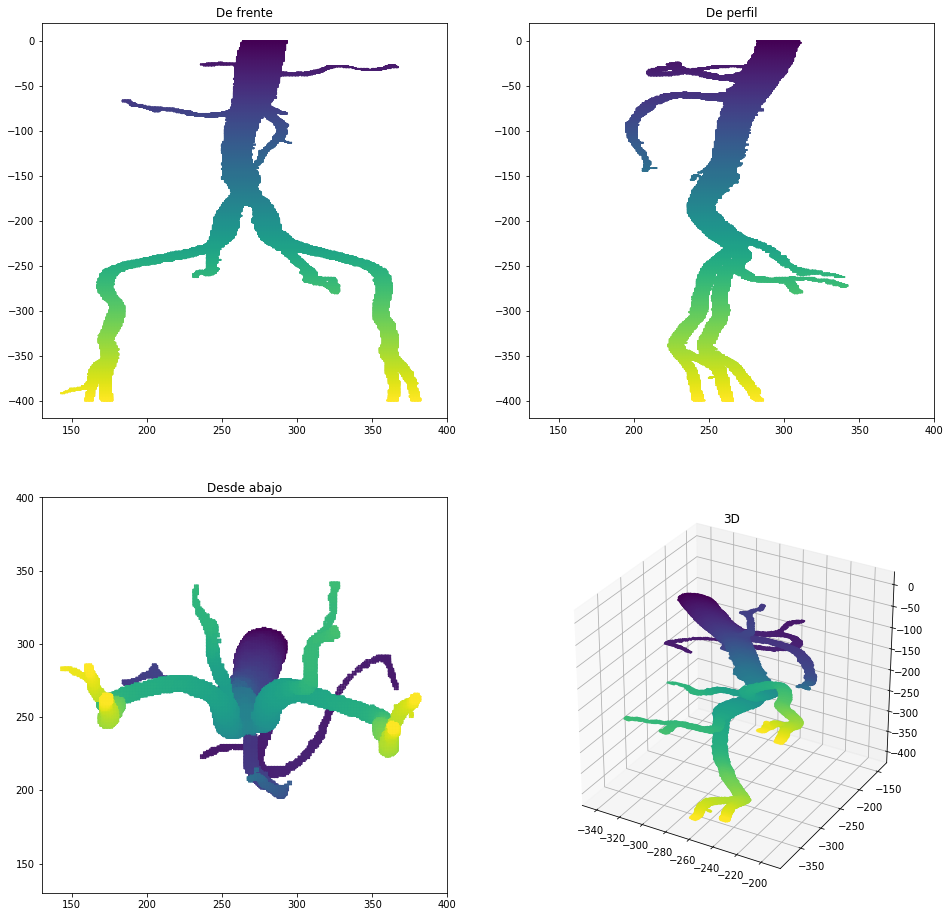

In [11]:
fig = plt.figure(figsize=(16, 16))

ax = fig.add_subplot(221)
ax.set_xlim(130,400)
ax.set_title("De frente")
ax.scatter(y,-z, c=z, s=1)

ax = fig.add_subplot(222)
ax.set_xlim(130,400)
ax.set_title("De perfil")
ax.scatter(x,-z, c=z, s=1)

ax = fig.add_subplot(223)
ax.set_xlim(130,400)
ax.set_ylim(130,400)
ax.set_title("Desde abajo")
ax.scatter(y,x, c=z, s=1)

ax = fig.add_subplot(224, projection='3d')
ax.set_title("3D")
ax.scatter(-x, -y, -z, c=z, s=1)

plt.show()